# Explore here

In [4]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id= os.getenv('CLIENT_ID')
client_secret= os.getenv('CLIENT_SECRET')



In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [6]:
artist_id = "6qqNVTkY8uBg9cP3Jd7DAH"

response = con.artist_top_tracks(artist_id)

print(response)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6qqNVTkY8uBg9cP3Jd7DAH'}, 'href': 'https://api.spotify.com/v1/artists/6qqNVTkY8uBg9cP3Jd7DAH', 'id': '6qqNVTkY8uBg9cP3Jd7DAH', 'name': 'Billie Eilish', 'type': 'artist', 'uri': 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', '

In [7]:
if response:
    tracks = response['tracks']

print(tracks[0]['artists'][0]['name'])

tracks1 = [{k:(v/(1000*60)%60) if k == 'duration_ms' else v for k,v in track.items() if k in ['name', 'popularity','duration_ms']} for track in tracks]

Billie Eilish


In [8]:
tracks2=[]

for track in tracks:
    cancion ={}
    for k,v in track.items():
        if k in ['name','popularity','duration_ms']:
            if k == 'duration_ms':
                v= (v/1000*60)%60
            cancion[k]= v
            print(cancion)
        tracks2.append(cancion)

print(tracks2)

{'duration_ms': 22.3799999999992}
{'duration_ms': 22.3799999999992, 'name': 'BIRDS OF A FEATHER'}
{'duration_ms': 22.3799999999992, 'name': 'BIRDS OF A FEATHER', 'popularity': 98}
{'duration_ms': 27.960000000000946}
{'duration_ms': 27.960000000000946, 'name': 'WILDFLOWER'}
{'duration_ms': 27.960000000000946, 'name': 'WILDFLOWER', 'popularity': 95}
{'duration_ms': 26.400000000001455}
{'duration_ms': 26.400000000001455, 'name': 'CHIHIRO'}
{'duration_ms': 26.400000000001455, 'name': 'CHIHIRO', 'popularity': 89}
{'duration_ms': 19.80000000000109}
{'duration_ms': 19.80000000000109, 'name': 'Guess featuring billie eilish'}
{'duration_ms': 19.80000000000109, 'name': 'Guess featuring billie eilish', 'popularity': 85}
{'duration_ms': 11.100000000000364}
{'duration_ms': 11.100000000000364, 'name': 'lovely (with Khalid)'}
{'duration_ms': 11.100000000000364, 'name': 'lovely (with Khalid)', 'popularity': 87}
{'duration_ms': 22.139999999999418}
{'duration_ms': 22.139999999999418, 'name': 'What Was I

In [9]:
tracks_df = pd.DataFrame.from_records(tracks1)
tracks_df

,duration_ms,name,popularity
0,3.506217,BIRDS OF A FEATHER,98
1,4.357767,WILDFLOWER,95
2,5.057333,CHIHIRO,89
3,2.388833,Guess featuring billie eilish,85
4,3.336417,lovely (with Khalid),87
5,3.706150,What Was I Made For? [From The Motion Picture ...,86
6,3.342667,ocean eyes,74
7,2.993100,LUNCH,86
8,3.267950,when the party's over,85
9,4.689667,TV,85


In [10]:
tracks_df.sort_values(['popularity'],inplace=True,ascending=False)
tracks_df

,duration_ms,name,popularity
0,3.506217,BIRDS OF A FEATHER,98
1,4.357767,WILDFLOWER,95
2,5.057333,CHIHIRO,89
4,3.336417,lovely (with Khalid),87
5,3.706150,What Was I Made For? [From The Motion Picture ...,86
7,2.993100,LUNCH,86
3,2.388833,Guess featuring billie eilish,85
8,3.267950,when the party's over,85
9,4.689667,TV,85
6,3.342667,ocean eyes,74


In [11]:
tracks_df.head(3)

,duration_ms,name,popularity
0,3.506217,BIRDS OF A FEATHER,98
1,4.357767,WILDFLOWER,95
2,5.057333,CHIHIRO,89


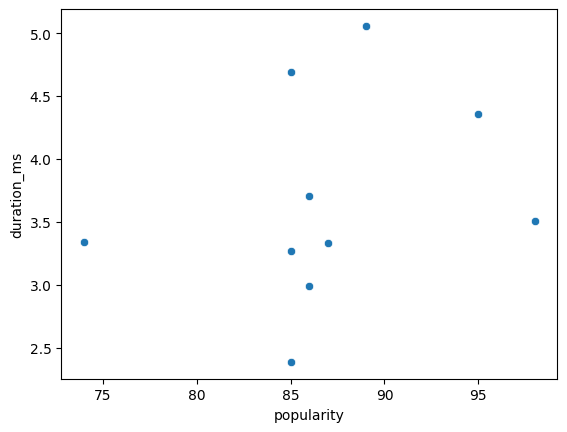

In [13]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x='popularity',y='duration_ms')
fig = scatter_plot.get_figure()
fig.savefig('scatter_plot.png')